# DECISION TREE CLASSIFIER MODEL

In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix
from sklearn import datasets
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
# Load the dataset
data = pd.read_csv("updated_pollution_dataset.csv")

In [4]:
#basic level EDA
data.describe()

,Temperature,Humidity,PM2.5,PM10,NO2,SO2,CO,Proximity_to_Industrial_Areas,Population_Density
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,30.029020,70.056120,20.142140,30.218360,26.412100,10.014820,1.500354,8.425400,497.423800
std,6.720661,15.863577,24.554546,27.349199,8.895356,6.750303,0.546027,3.610944,152.754084
min,13.400000,36.000000,0.000000,-0.200000,7.400000,-6.200000,0.650000,2.500000,188.000000
25%,25.100000,58.300000,4.600000,12.300000,20.100000,5.100000,1.030000,5.400000,381.000000
50%,29.000000,69.800000,12.000000,21.700000,25.300000,8.000000,1.410000,7.900000,494.000000
75%,34.000000,80.300000,26.100000,38.100000,31.900000,13.725000,1.840000,11.100000,600.000000
max,58.600000,128.100000,295.000000,315.800000,64.900000,44.900000,3.720000,25.800000,957.000000


In [5]:
# Manually encode target labels
label_mapping = {'Good': 3, 'Moderate': 2, 'Poor': 1, 'Hazardous': 0}
data['Air Quality'] = data['Air Quality'].map(label_mapping)

In [6]:
X = data.drop(columns=['Air Quality'])
y = data['Air Quality']

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [8]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [9]:
dt = DecisionTreeClassifier(random_state=1, max_depth = 15)

In [10]:
# train the model
dt.fit(X_train_scaled, y_train)

DecisionTreeClassifier(max_depth=15, random_state=1)

In [11]:
# make predictions
dt_pred = dt.predict(X_test_scaled)

In [12]:
# print the accuracy
print("Accuracy of Decision Tree Classifier: ", accuracy_score(y_test, dt_pred))

Accuracy of Decision Tree Classifier:  0.921


Precision of Decision Tree Classifier:  0.9210399144594
Recall of Decision Tree Classifier:  0.921
F1-Score of Decision Tree Classifier:  0.9210094804958683
              precision    recall  f1-score   support

           0       0.82      0.82      0.82       100
           1       0.82      0.81      0.82       200
           2       0.92      0.93      0.93       296
           3       1.00      0.99      0.99       404

    accuracy                           0.92      1000
   macro avg       0.89      0.89      0.89      1000
weighted avg       0.92      0.92      0.92      1000



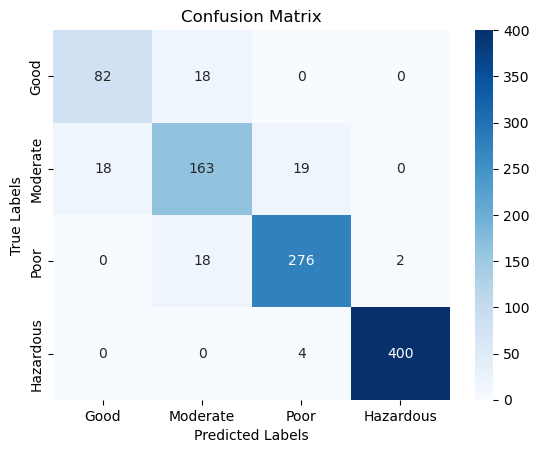

In [13]:
# print other performance metrics
print("Precision of Decision Tree Classifier: ", precision_score(y_test, dt_pred, average='weighted'))
print("Recall of Decision Tree Classifier: ",  recall_score(y_test, dt_pred, average='weighted'))
print("F1-Score of Decision Tree Classifier: ", f1_score(y_test, dt_pred, average='weighted'))
print(classification_report(y_test, dt_pred))
conf_matrix = confusion_matrix(y_test, dt_pred)
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=label_mapping.keys(), yticklabels=label_mapping.keys())
plt.title("Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

# RANDOM FOREST CLASSIFIER MODEL

In [15]:
from sklearn.ensemble import RandomForestClassifier

In [16]:
rf = RandomForestClassifier(random_state=1, n_estimators = 60)

In [17]:
# train the model
rf.fit(X_train_scaled, y_train)

RandomForestClassifier(n_estimators=60, random_state=1)

In [18]:
# make predictions
rf_pred = rf.predict(X_test_scaled)

In [19]:
# print the accuracy
print("Accuracy of Random Forest Classifier: ",accuracy_score(y_test, rf_pred))

Accuracy of Random Forest Classifier:  0.951


Precision of Random Forest Classifier:  0.9507017047368775
Recall of Random Forest Classifier:  0.951
F1-Score of Random Forest Classifier:  0.9506948339954563
              precision    recall  f1-score   support

           0       0.92      0.88      0.90       100
           1       0.90      0.87      0.88       200
           2       0.93      0.97      0.95       296
           3       1.00      1.00      1.00       404

    accuracy                           0.95      1000
   macro avg       0.94      0.93      0.93      1000
weighted avg       0.95      0.95      0.95      1000



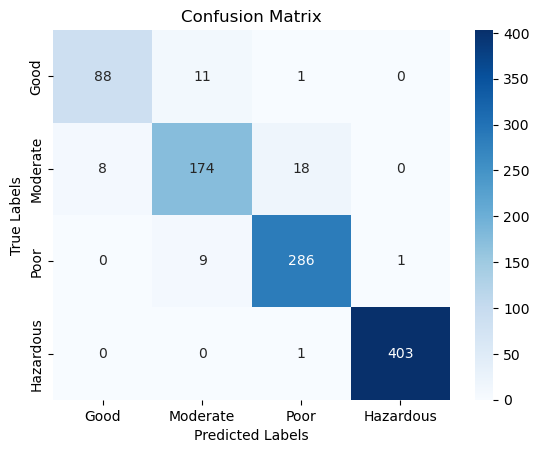

In [20]:
# print other performance metrics
print("Precision of Random Forest Classifier: ", precision_score(y_test, rf_pred, average='weighted'))
print("Recall of Random Forest Classifier: ", recall_score(y_test, rf_pred, average='weighted'))
print("F1-Score of Random Forest Classifier: ", f1_score(y_test, rf_pred, average='weighted'))
print(classification_report(y_test, rf_pred))
conf_matrix = confusion_matrix(y_test, rf_pred)
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=label_mapping.keys(), yticklabels=label_mapping.keys())
plt.title("Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

# LOGISTIC REGRESSION MODEL

In [22]:
from sklearn.linear_model import LogisticRegression

In [23]:
log_reg = LogisticRegression(max_iter=1000, random_state=1)

In [24]:
# train the model
log_reg.fit(X_train_scaled, y_train)

LogisticRegression(max_iter=1000, random_state=1)

In [25]:
# Make predictions
log_pred = log_reg.predict(X_test_scaled)

In [26]:
# print the accuracy
print("Accuracy of Logistic Regression: ", accuracy_score(y_test, log_pred))

Accuracy of Logistic Regression:  0.941


Precision of Logistic Regression:  0.940204471184194
Recall of Logistic Regression:  0.941
F1-Score of Logistic Regression:  0.9405088422557155
              precision    recall  f1-score   support

           0       0.87      0.84      0.85       100
           1       0.87      0.84      0.86       200
           2       0.94      0.96      0.95       296
           3       0.99      1.00      1.00       404

    accuracy                           0.94      1000
   macro avg       0.92      0.91      0.91      1000
weighted avg       0.94      0.94      0.94      1000



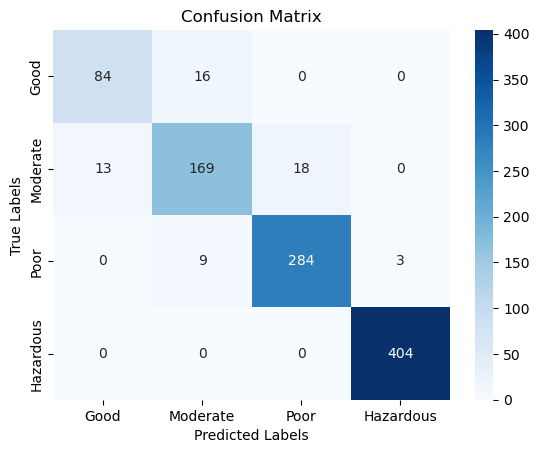

In [27]:
# print other performance metrics
print("Precision of Logistic Regression: ", precision_score(y_test, log_pred, average='weighted'))
print("Recall of Logistic Regression: ", recall_score(y_test, log_pred, average='weighted'))
print("F1-Score of Logistic Regression: ", f1_score(y_test, log_pred, average='weighted'))
print(classification_report(y_test, log_pred))
conf_matrix = confusion_matrix(y_test, log_pred)
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=label_mapping.keys(), yticklabels=label_mapping.keys())
plt.title("Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

# COMPARISION BETWEEN THE THREE MODELS

In [29]:
metrics_data = {
    "Metric": ["Accuracy", "Precision", "Recall", "F1-Score","Weighted Avg F1"],
    "Decision Tree Classifier": [0.921, 0.921, 0.921, 0.921, 0.92],
    "Random Forest Classifier": [0.951, 0.950, 0.951, 0.950, 0.95],
    "Logistic Regression": [0.941, 0.940, 0.941, 0.941, 0.94]
}
metrics_df = pd.DataFrame(metrics_data)
metrics_df

,Metric,Decision Tree Classifier,Random Forest Classifier,Logistic Regression
0,Accuracy,0.921,0.951,0.941
1,Precision,0.921,0.950,0.940
2,Recall,0.921,0.951,0.941
3,F1-Score,0.921,0.950,0.941
4,Weighted Avg F1,0.920,0.950,0.940


The Random Forest Classifier is the best model among the three, as it consistently outperforms the others across all metrics. This makes it the most reliable choice for your application.Decision Tree Classifier and Logistic Regression are both slightly behind, with similar performance.